In [1]:
import os
import keras
import numpy as np
from PIL import Image
import tensorflow as tf
from random import randint
import matplotlib.pyplot as plt
from keras import backend as k
from keras.utils import np_utils
from keras.optimizers import adam
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import img_to_array
from keras.metrics import categorical_crossentropy
#from sklearn.cross_validation import train_test_split
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Convolution2D,MaxPooling2D


Using TensorFlow backend.


# Build VGG16 model

VGG16 works with activation="softmax" which does not works here.

In [2]:
vgg16_model=keras.applications.vgg16.VGG16()


Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 21s 0us/step


In [3]:
vgg16_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

vgg16 is a model not a sequential model. It needs to be transformed to a sequential model.
Sequential model create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

In [4]:
type(vgg16_model)


keras.engine.training.Model

In [0]:
model=Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    model.trainable=False
    

Remove the last layer of 1000 categories and add the current selection

In [0]:
model.add(Dense(units=2))
model.add(Activation(tf.nn.softmax))


# Prediction

In [7]:
from google.colab import files
uploaded = files.upload()

Saving dog.6.jpg to dog.6.jpg


In [0]:
from keras.preprocessing.image import load_img
# load an image from file
image_path='dog.6.jpg'
image = load_img(image_path, target_size=(224, 224))

In [9]:
np.shape(image)

(224, 224, 3)

In [0]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [0]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [12]:
from keras.applications.vgg16 import decode_predictions
# predict the probability across all output classes
yhat = model.predict(image)
yhat

array([[0.03290224, 0.96709776]], dtype=float32)

# Data Augmentation

Data Augmentation occures when creating new data with modification.
Filpp, Rotate, Zoom,Color change,Cropping

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc,ndimage
import keras
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator


In [0]:
gen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,
                       height_shift_range=0.1,shear_range=0.15,
                       zoom_range=0.1,channel_shift_range=10,
                       horizontal_flip=True)


In [0]:
import cv2
image_path='dog.6.jpg'


In [0]:
image=cv2.imread(image_path)


In [22]:
np.shape(image)

(488, 499, 3)

In [23]:
image_batch = image.reshape((1,)+image.shape)
np.shape(image_batch)

(1, 488, 499, 3)

Get 10 sample of the batches

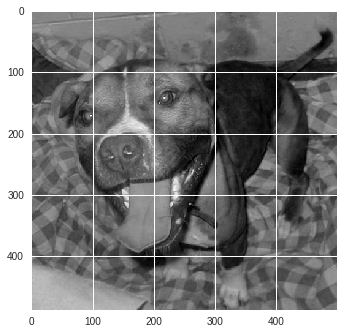

In [24]:
import matplotlib.pyplot as plt
plt.imshow(image[:,:,0], cmap='gray')
plt.show()


generate batches of image

In [0]:
aug_iter=gen.flow(image_batch)
aug_images=[next(aug_iter)[0].astype(np.uint8) for i in range(10)]


# 

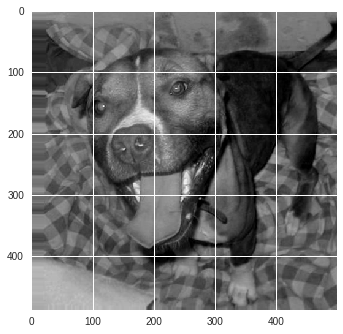

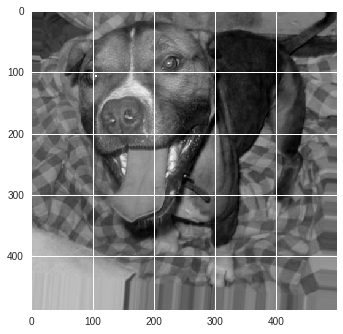

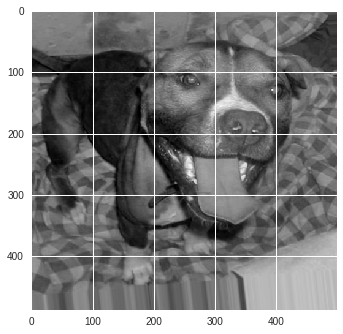

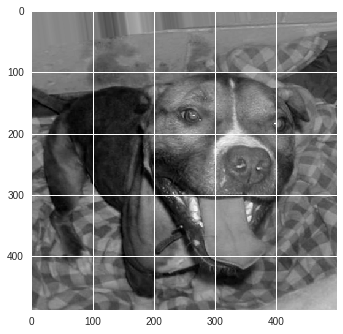

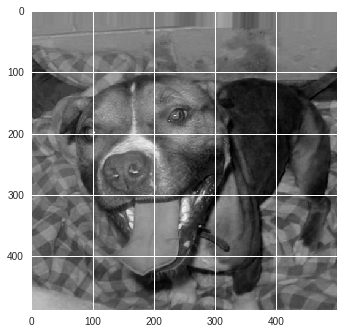

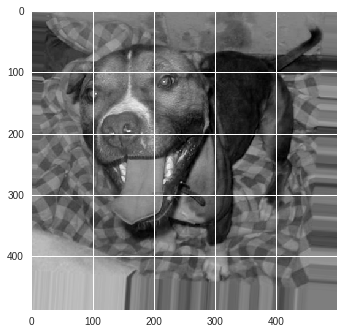

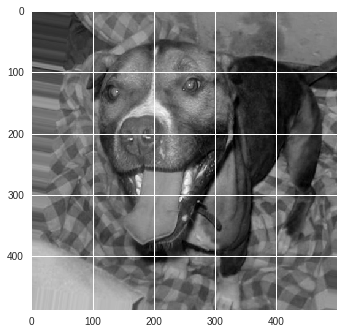

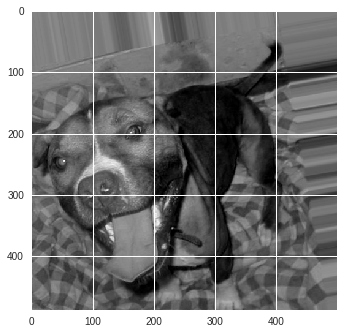

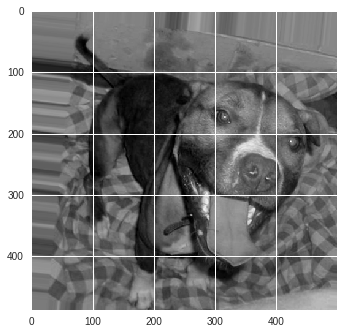

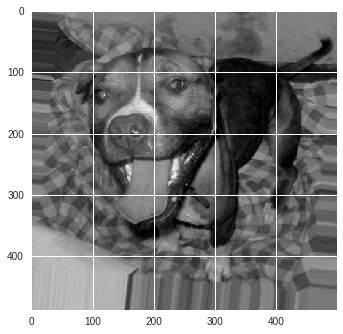

In [28]:
for i in range(0,10):
    img = aug_images[i]
    plt.imshow(img[:,:,0].astype('uint8'),cmap="gray")
    plt.show()
    

In [0]:
len(np.random.permutation(100))

100